# Customer Churn — Data Visualisation
**EPITA – MSc AIS**  
Load `customer_churn_clean.csv` and explore the data visually.

---
## 1. Imports & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')
df = pd.read_csv('customer_churn_clean.csv') #update the path if needed
print(df.shape)
df.head()

(7032, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customerID        7032 non-null   object  
 1   gender            7032 non-null   object  
 2   SeniorCitizen     7032 non-null   int64   
 3   Partner           7032 non-null   object  
 4   Dependents        7032 non-null   object  
 5   tenure            7032 non-null   int64   
 6   PhoneService      7032 non-null   object  
 7   MultipleLines     7032 non-null   object  
 8   InternetService   7032 non-null   object  
 9   OnlineSecurity    7032 non-null   object  
 10  OnlineBackup      7032 non-null   object  
 11  DeviceProtection  7032 non-null   object  
 12  TechSupport       7032 non-null   object  
 13  StreamingTV       7032 non-null   object  
 14  StreamingMovies   7032 non-null   object  
 15  Contract          7032 non-null   object  
 16  PaperlessBilling  7032 n

***Data types & missing values overview***

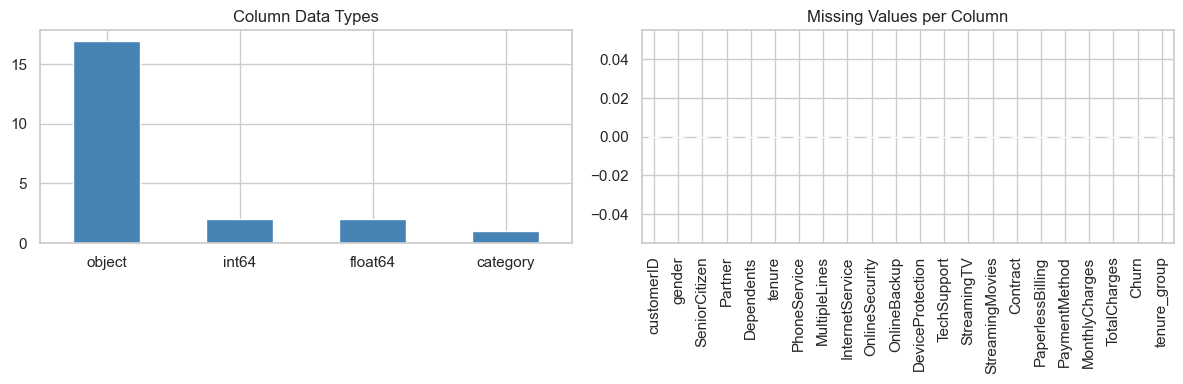

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

dtypes = df.dtypes.astype(str).value_counts()
dtypes.plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='white')
axes[0].set_title('Column Data Types')
axes[0].set_xticklabels(dtypes.index, rotation=0)

missing = df.isnull().sum().sort_values(ascending=False)
missing.plot(kind='bar', ax=axes[1], color='tomato', edgecolor='white')
axes[1].set_title('Missing Values per Column')

plt.tight_layout()
plt.show()

***Value counts for every categorical column***

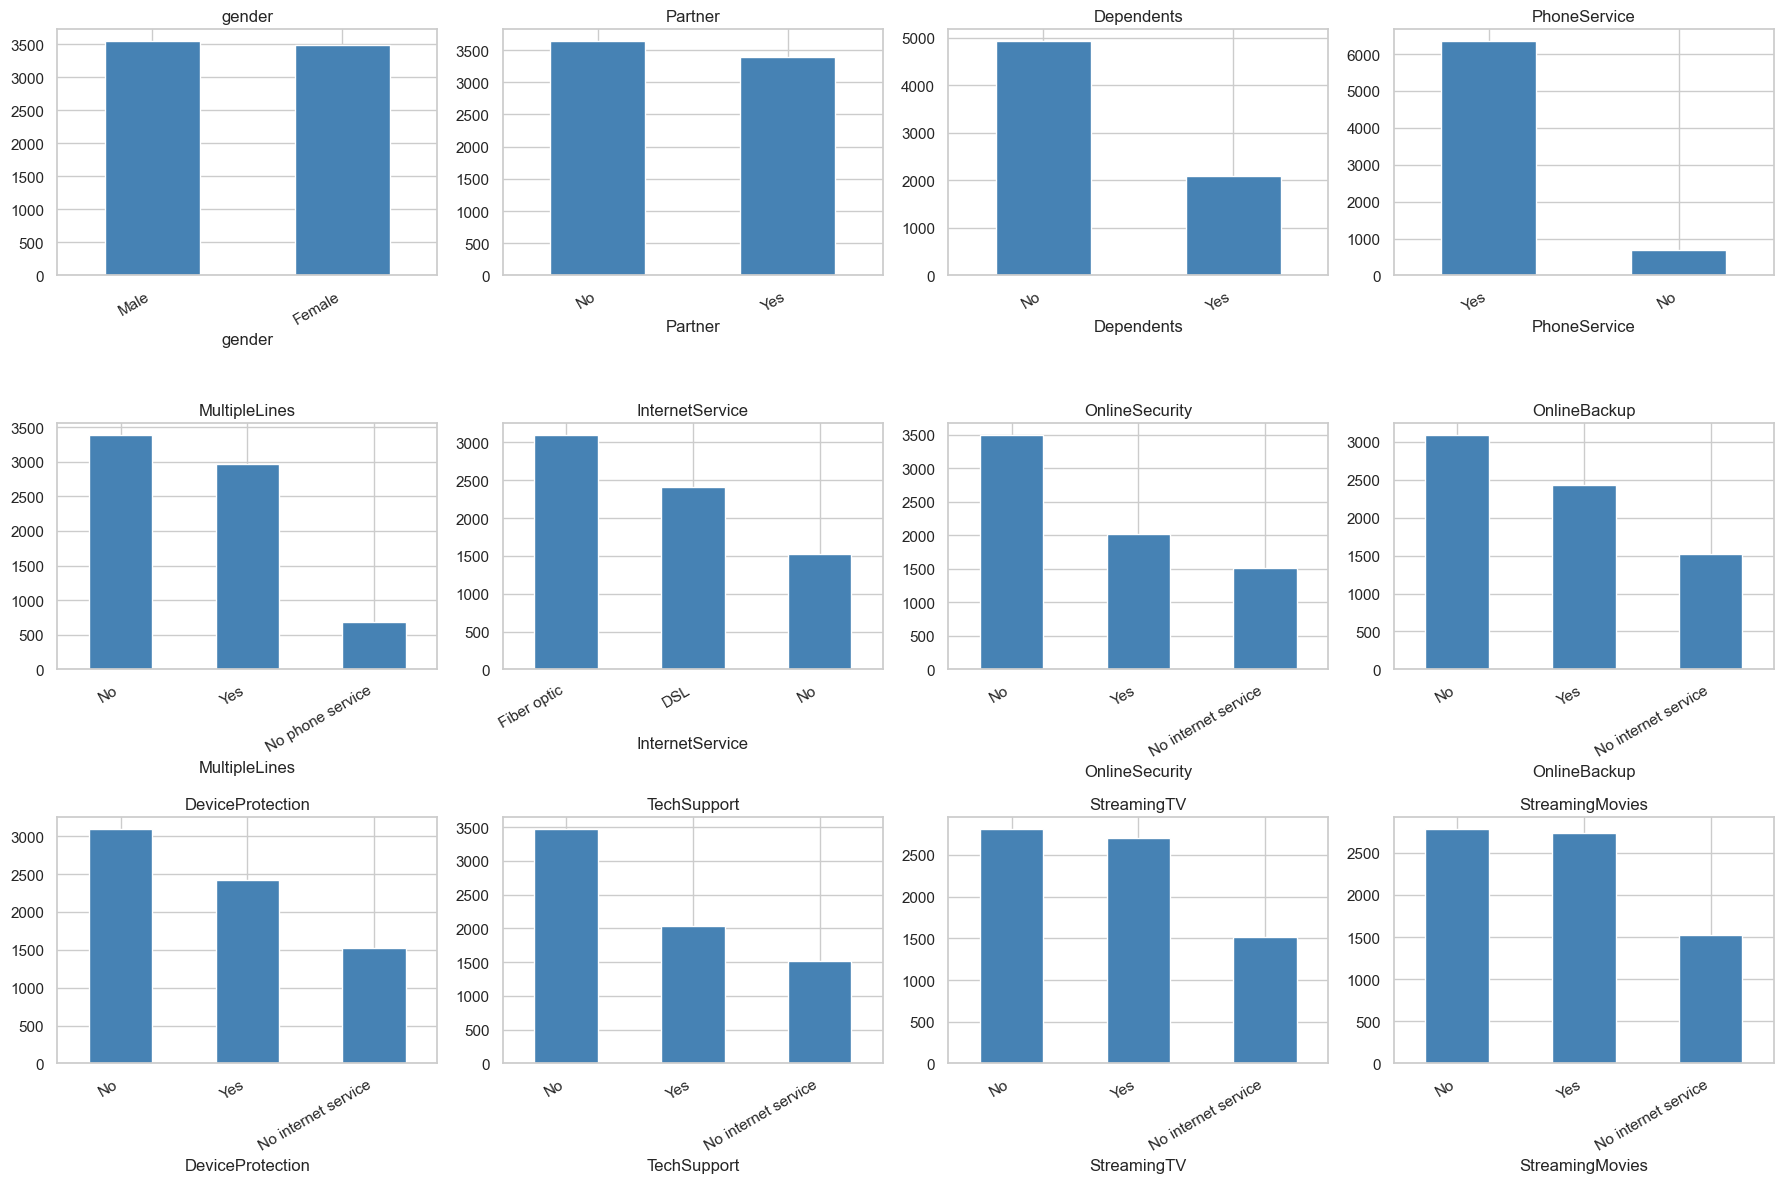

In [16]:
cat_cols = [c for c in df.select_dtypes(include='object').columns if c != 'customerID']

fig, axes = plt.subplots(3, 4, figsize=(18, 12))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    df[col].value_counts().plot(kind='bar', ax=ax, color='steelblue', edgecolor='white')
    ax.set_title(col)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right')

for ax in axes[len(cat_cols):]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

***Distribution of numerical columns***

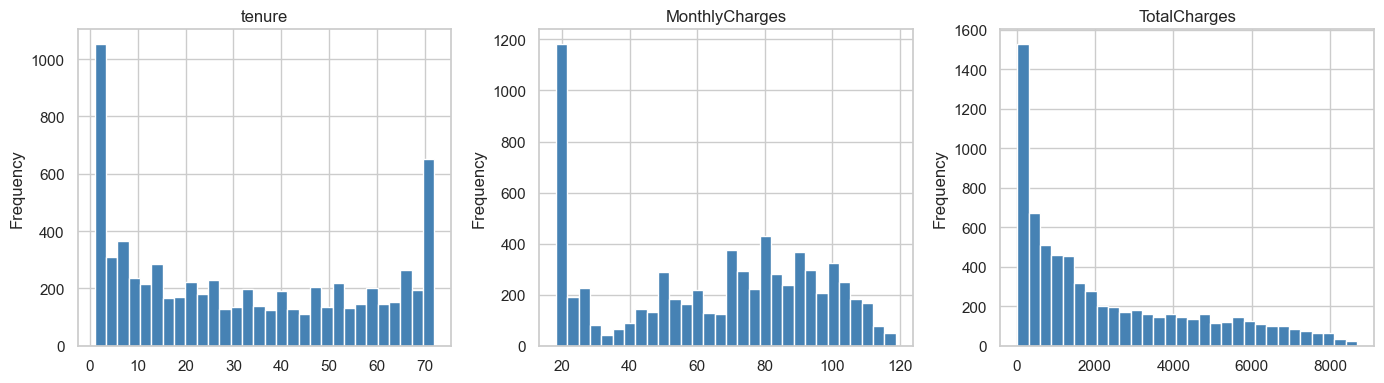

In [17]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, col in zip(axes, num_cols):
    df[col].plot(kind='hist', bins=30, ax=ax, color='steelblue', edgecolor='white')
    ax.set_title(col)
    ax.set_xlabel('')

plt.tight_layout()
plt.show()

---
## 2. Churn Distribution

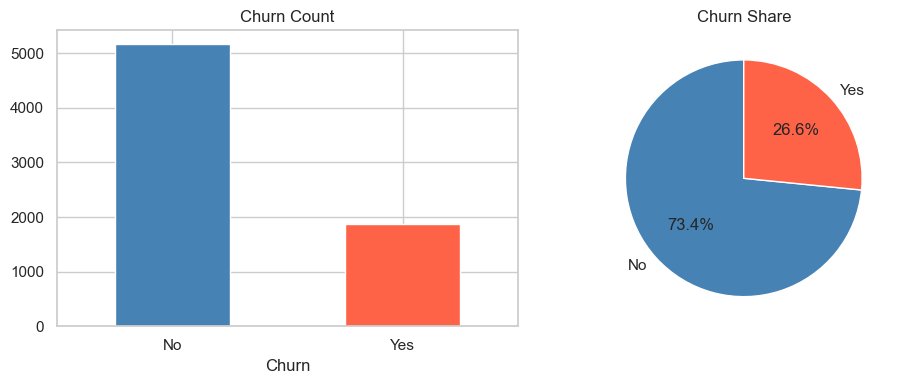

In [2]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

df['Churn'].value_counts().plot(kind='bar', ax=axes[0], color=['steelblue','tomato'], edgecolor='white')
axes[0].set_title('Churn Count')
axes[0].set_xticklabels(['No','Yes'], rotation=0)

df['Churn'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%',
                                colors=['steelblue','tomato'], startangle=90)
axes[1].set_ylabel('')
axes[1].set_title('Churn Share')

plt.tight_layout()
plt.show()

---
## 3. Numerical Features

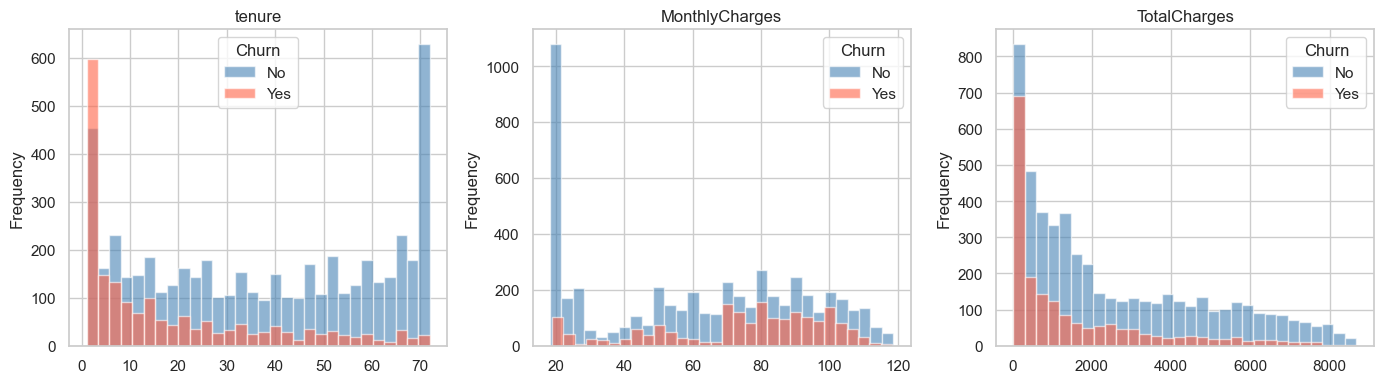

In [3]:
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, col in zip(axes, num_cols):
    for label, color in [('No','steelblue'), ('Yes','tomato')]:
        df[df['Churn']==label][col].plot(kind='hist', bins=30, alpha=0.6,
                                         color=color, label=label, ax=ax)
    ax.set_title(col)
    ax.legend(title='Churn')

plt.tight_layout()
plt.show()

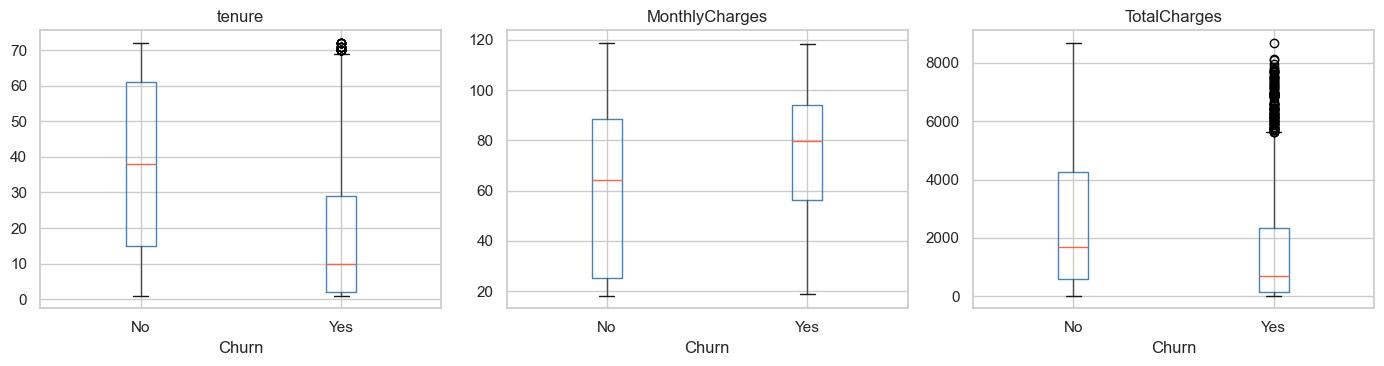

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

for ax, col in zip(axes, num_cols):
    df.boxplot(column=col, by='Churn', ax=ax,
               boxprops=dict(color='steelblue'),
               medianprops=dict(color='tomato'))
    ax.set_title(col)
    ax.set_xlabel('Churn')

plt.suptitle('')
plt.tight_layout()
plt.show()

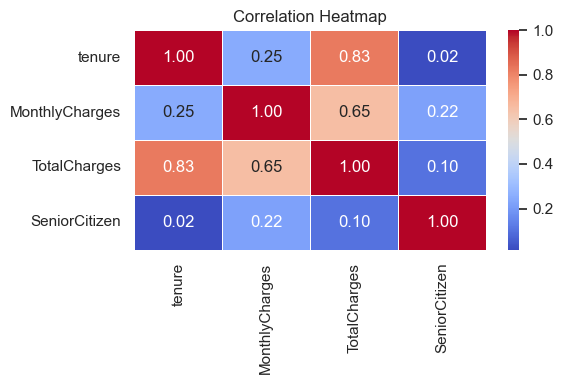

In [5]:
corr = df[num_cols + ['SeniorCitizen']].corr()
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

---
## 4. Categorical Features vs Churn

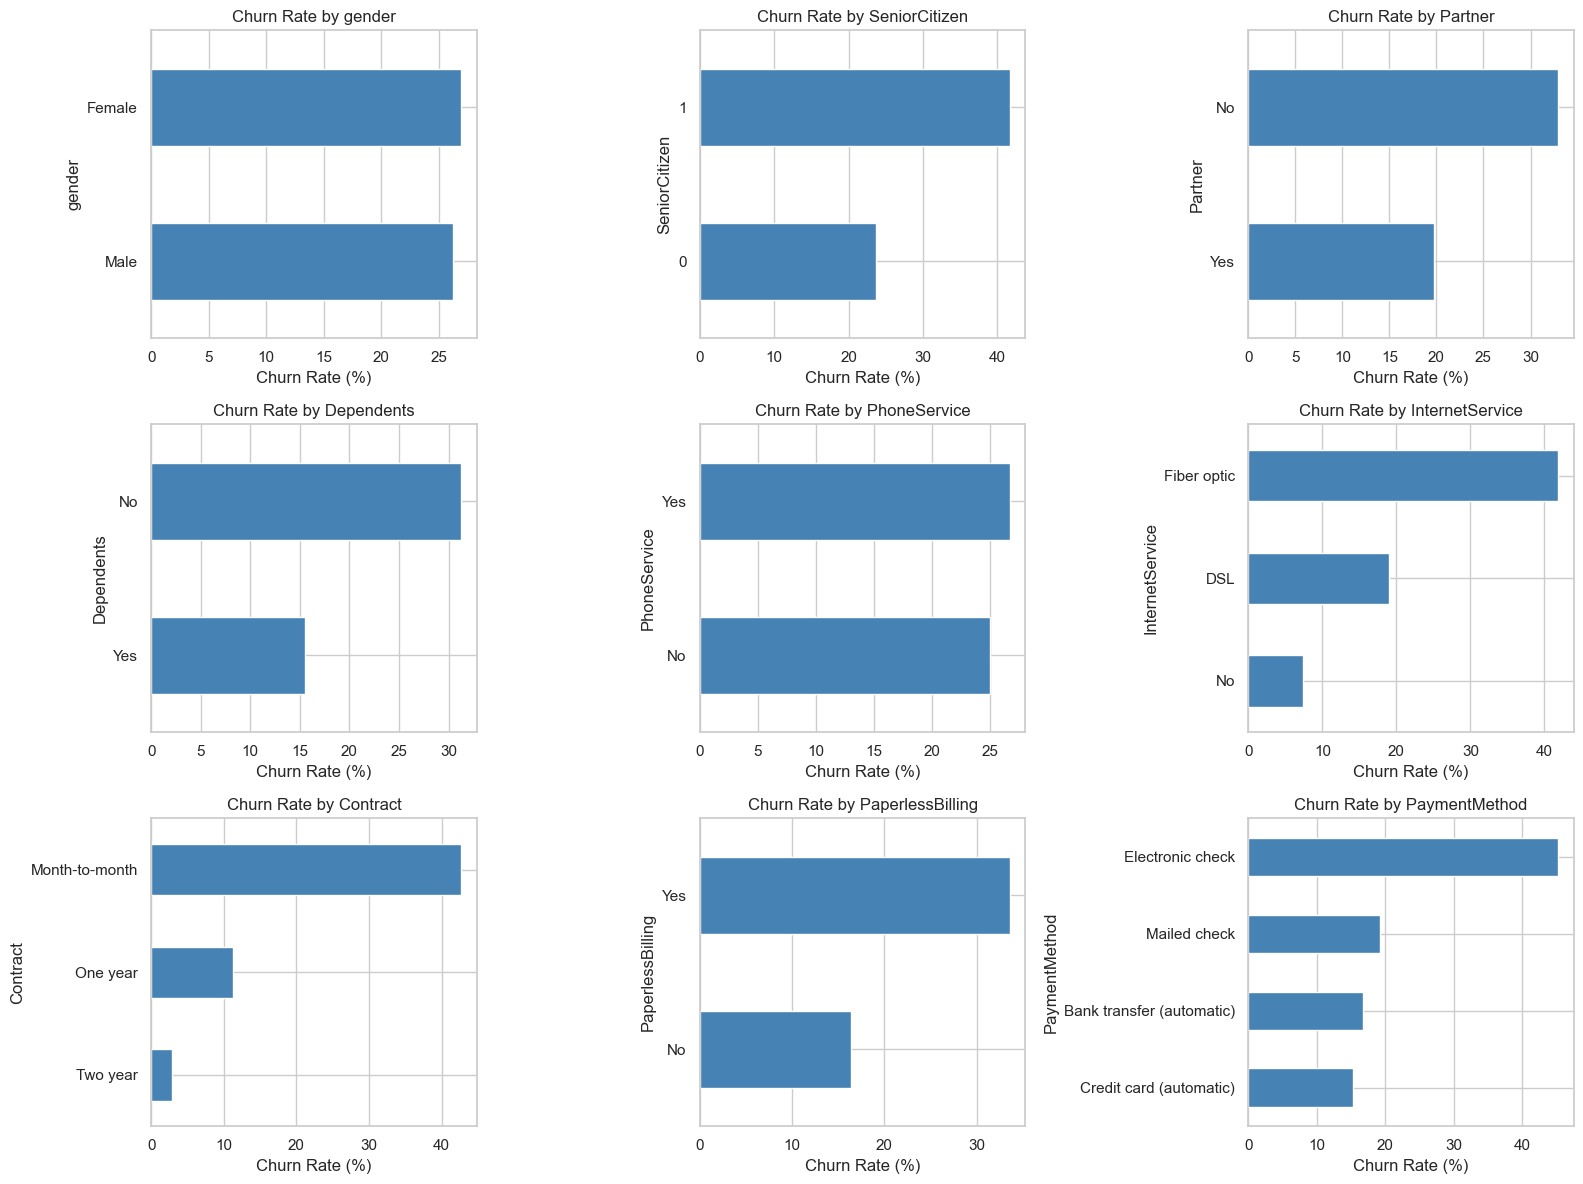

In [6]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
            'PhoneService', 'InternetService', 'Contract',
            'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for ax, col in zip(axes, cat_cols):
    churn_rate = df.groupby(col)['Churn'].apply(lambda x: (x=='Yes').mean() * 100)
    churn_rate.sort_values().plot(kind='barh', ax=ax, color='steelblue', edgecolor='white')
    ax.set_title(f'Churn Rate by {col}')
    ax.set_xlabel('Churn Rate (%)')

plt.tight_layout()
plt.show()

---
## 5. Key Segments

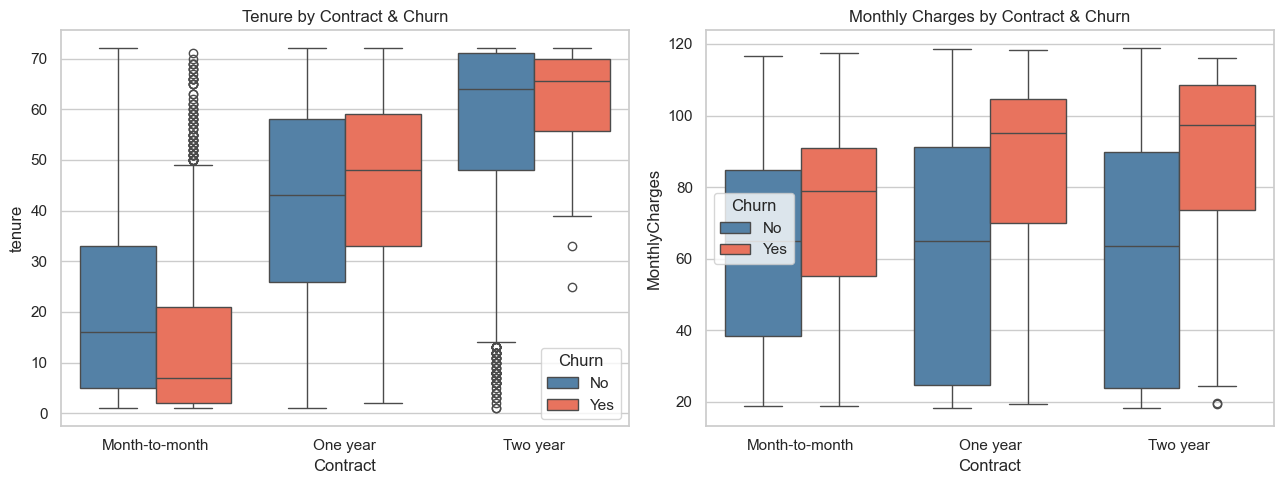

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))

sns.boxplot(data=df, x='Contract', y='tenure', hue='Churn',
            palette={'No':'steelblue','Yes':'tomato'}, ax=axes[0])
axes[0].set_title('Tenure by Contract & Churn')

sns.boxplot(data=df, x='Contract', y='MonthlyCharges', hue='Churn',
            palette={'No':'steelblue','Yes':'tomato'}, ax=axes[1])
axes[1].set_title('Monthly Charges by Contract & Churn')

plt.tight_layout()
plt.show()

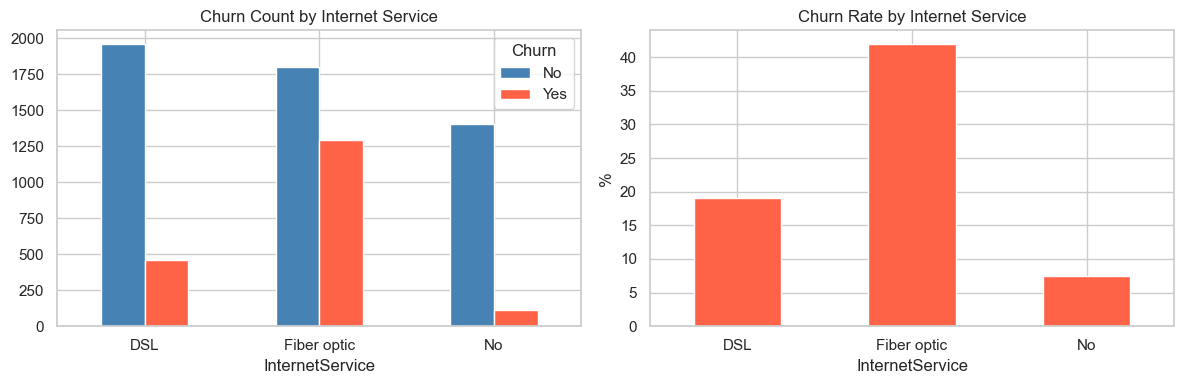

In [8]:
pivot = df.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)
pivot['churn_rate'] = pivot['Yes'] / pivot.sum(axis=1) * 100

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

pivot[['No','Yes']].plot(kind='bar', ax=axes[0],
                         color=['steelblue','tomato'], edgecolor='white')
axes[0].set_title('Churn Count by Internet Service')
axes[0].set_xticklabels(pivot.index, rotation=0)

pivot['churn_rate'].plot(kind='bar', ax=axes[1], color='tomato', edgecolor='white')
axes[1].set_title('Churn Rate by Internet Service')
axes[1].set_ylabel('%')
axes[1].set_xticklabels(pivot.index, rotation=0)

plt.tight_layout()
plt.show()

C:\Users\pc\AppData\Local\Temp\ipykernel_10428\748345796.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_by_tenure = df.groupby('tenure_group')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)


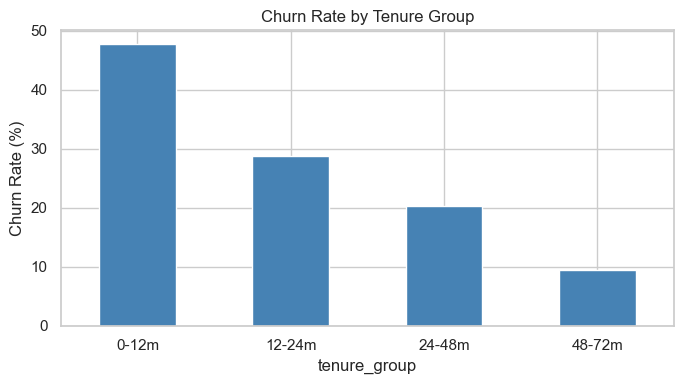

In [9]:
df['tenure_group'] = pd.cut(df['tenure'], bins=[0,12,24,48,72],
                            labels=['0-12m','12-24m','24-48m','48-72m'])

churn_by_tenure = df.groupby('tenure_group')['Churn'].apply(lambda x: (x=='Yes').mean() * 100)

plt.figure(figsize=(7, 4))
churn_by_tenure.plot(kind='bar', color='steelblue', edgecolor='white')
plt.title('Churn Rate by Tenure Group')
plt.ylabel('Churn Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

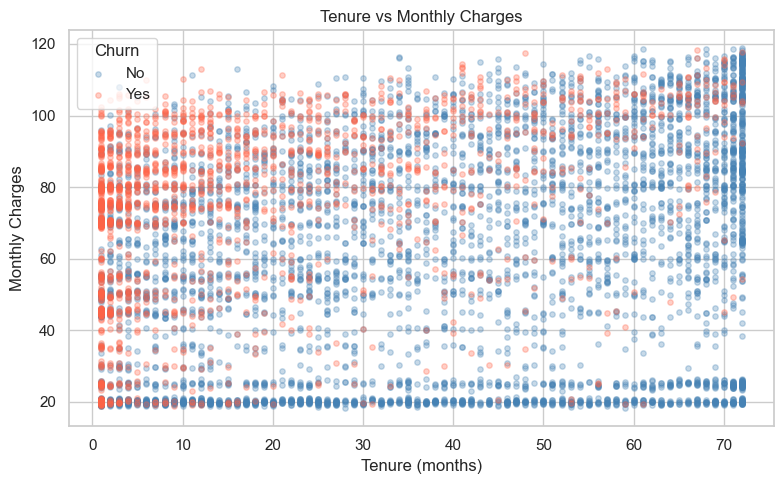

In [10]:
plt.figure(figsize=(8, 5))
for label, color in [('No','steelblue'), ('Yes','tomato')]:
    sub = df[df['Churn']==label]
    plt.scatter(sub['tenure'], sub['MonthlyCharges'],
                alpha=0.3, s=15, color=color, label=label)
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.title('Tenure vs Monthly Charges')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

---
## 6. Senior Citizens

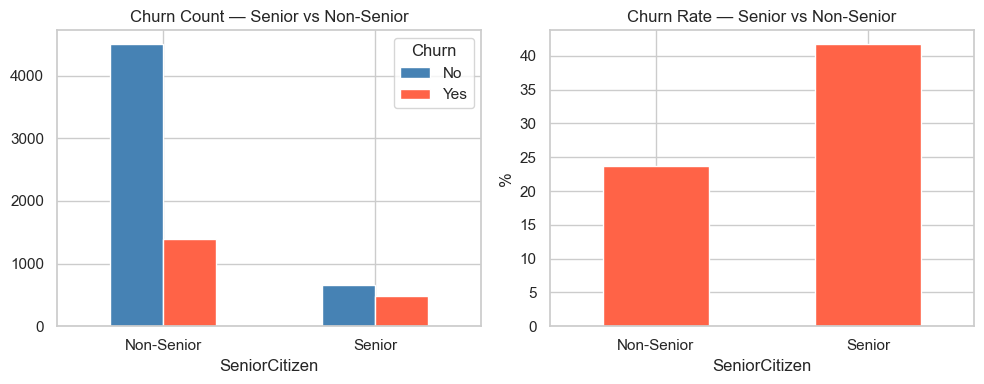

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

senior_count = df.groupby(['SeniorCitizen','Churn']).size().unstack(fill_value=0)
senior_count.plot(kind='bar', ax=axes[0], color=['steelblue','tomato'], edgecolor='white')
axes[0].set_title('Churn Count — Senior vs Non-Senior')
axes[0].set_xticklabels(['Non-Senior','Senior'], rotation=0)

senior_rate = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x=='Yes').mean()*100)
senior_rate.plot(kind='bar', ax=axes[1], color='tomato', edgecolor='white')
axes[1].set_title('Churn Rate — Senior vs Non-Senior')
axes[1].set_xticklabels(['Non-Senior','Senior'], rotation=0)
axes[1].set_ylabel('%')

plt.tight_layout()
plt.show()